# 네이버 뉴스 기사 크롤링

In [50]:
from bs4 import BeautifulSoup
import requests
import time
import re
import datetime
from tqdm import tqdm
import sys
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

%matplotlib inline
from konlpy.tag import Mecab
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import Okt
from konlpy.tag import Kkma

#웹드라이버 설정
service = Service(executable_path=f"C:/Users/user/Desktop/학기별 문서/현장실습/크롤링_워드클라우드/chromedriver-win64/chromedriver.exe")
options = webdriver.ChromeOptions()
options.add_argument("headless")
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option("useAutomationExtension", False)

In [51]:
# 페이지 url 형식에 맞게 바꾸어 주는 함수 만들기
  #입력된 수를 1, 11, 21, 31 ...만들어 주는 함수
def makePgNum(num):
    if num == 1:
        return num
    elif num == 0:
        return num+1
    else:
        return num+9*(num-1)

# 크롤링할 url 생성하는 함수 만들기(검색어, 크롤링 시작 페이지, 크롤링 종료 페이지)
def makeUrl(search, start_pg, end_pg, s_date, e_date):
    urls = []
    s_from = s_date.replace(".", "")
    e_to = e_date.replace(".", "")
    for i in range(start_pg, end_pg + 1):
        page = makePgNum(i)
        url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=" + search + "&sort=0&ds=" + s_date + "&de=" + e_date + "&nso=so%3Ar%2Cp%3Afrom" + s_from + "to" + e_to + "&start=" + str(page)
        urls.append(url)
    print("생성url: ", urls)
    return urls    

# # html에서 원하는 속성 추출하는 함수 만들기 (기사, 추출하려는 속성값)
# def news_attrs_crawler(articles,attrs):
#     attrs_content=[]
#     for i in articles:
#         attrs_content.append(i.attrs[attrs])
#     return attrs_content

# # ConnectionError방지
# headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/98.0.4758.102"}

# #html생성해서 기사크롤링하는 함수 만들기(url): 링크를 반환
# def articles_crawler(url):
#     #html 불러오기
#     original_html = requests.get(i,headers=headers)
#     html = BeautifulSoup(original_html.text, "html.parser")

#     url_naver = html.select("div.group_news > ul.list_news > li div.news_area > div.news_info > div.info_group > a.info")
#     url = news_attrs_crawler(url_naver,'href')
#     return url

In [114]:
# 검색어를 기준으로 1~10 페이지 Url 생성
keyword = input('input keyword : ')
s_date = input('input start_date : ')
e_date = input('input end_date : ')
url = makeUrl(keyword, 1, 5, s_date, e_date)

## selenium으로 navernews만 뽑아오기##
# 버전에 상관 없이 os에 설치된 크롬 브라우저 사용
driver = webdriver.Chrome(options=options, service=service)
driver.implicitly_wait(3)


# selenium으로 검색 페이지 불러오기 #
print("준비중...")
naver_urls=[]

for i in url:
    driver.get(i)
    time.sleep(1) #대기시간 변경 가능

    # 네이버 기사 눌러서 제목 및 본문 가져오기#
    # 네이버 기사가 있는 기사 css selector 모아오기
    a = driver.find_elements(By.CSS_SELECTOR,'a.info')

    # 위에서 생성한 css selector list 하나씩 클릭하여 본문 url얻기
    for i in a:
        # 네이버 뉴스 url만 가져오기
        if i.text == '네이버뉴스':
            i.click()

            # 현재탭에 접근
            driver.switch_to.window(driver.window_handles[1])
            driver.implicitly_wait(3) #대기시간 변경 가능

            # 네이버뉴스의 특정 도메인만을 수집
            url = driver.current_url
            if url.find("n.news.naver.com") != -1:
                print(url)
                naver_urls.append(url)

            # 현재 탭 닫기
            driver.close()

            # 다시처음 탭으로 돌아가기(매우 중요!!!)
            driver.switch_to.window(driver.window_handles[0])

if len(naver_urls) == 0:
    print("크롤링 할 수 있는 뉴스기사가 없습니다...")
else:
    print("모든 기사 url 수집 완료")

input keyword : 엘리멘탈
input start_date : 2023.07.15
input end_date : 2023.08.07
생성url:  ['https://search.naver.com/search.naver?where=news&sm=tab_pge&query=엘리멘탈&sort=0&ds=2023.07.15&de=2023.08.07&nso=so%3Ar%2Cp%3Afrom20230715to20230807&start=1', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=엘리멘탈&sort=0&ds=2023.07.15&de=2023.08.07&nso=so%3Ar%2Cp%3Afrom20230715to20230807&start=11', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=엘리멘탈&sort=0&ds=2023.07.15&de=2023.08.07&nso=so%3Ar%2Cp%3Afrom20230715to20230807&start=21', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=엘리멘탈&sort=0&ds=2023.07.15&de=2023.08.07&nso=so%3Ar%2Cp%3Afrom20230715to20230807&start=31', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=엘리멘탈&sort=0&ds=2023.07.15&de=2023.08.07&nso=so%3Ar%2Cp%3Afrom20230715to20230807&start=41']
준비중...
https://n.news.naver.com/mnews/article/421/0006974805?sid=105
https://n.news.naver.com/mnews/article/001/0014110070?

In [115]:
###naver 기사 본문 및 제목 가져오기###

# ConnectionError방지
headers = { "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/98.0.4758.102" }

titles = []
contents=[]
print("제목, 본문 가져오는중...")
for i in naver_urls:
    original_html = requests.get(i,headers=headers)
    html = BeautifulSoup(original_html.text, "html.parser")
    # 검색결과확인시
    # print(html)
    
    #뉴스 제목 가져오기
    title = html.select("div.media_end_head_title > h2")
    
    # list합치기
    title = ''.join(str(title))
    
    # html태그제거
    pattern1 = '<[^>]*>'
    title = re.sub(pattern=pattern1,repl='',string=title)
    
    titles.append(title)

    #뉴스 본문 가져오기
    content = html.select("div#contents > div#newsct_article")

    # list합치기
    content = ''.join(str(content))
    
    #html태그제거 및 텍스트 다듬기
    content = re.sub(pattern=pattern1,repl='',string=content)
    pattern2 = """[\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}"""
    content = content.replace(pattern2,'')

    contents.append(content)

titles_all = ""
contents_all = ""
news_all = ""

# 기사 별 제목 모두 합치기(string)
for i in titles:
    titles_all = titles_all + " " + i

# 기사 별 내용 모두 합치기(string)
for i in contents:
    contents_all = contents_all + " " + i

# 제목 + 기사 모두 합치기(string)
news_all = titles_all + contents_all

# 네이버뉴스의 태그가 위 조건에 맞지 않아 뉴스가 없을 경우 예외처리 
if len(news_all) == 0 :
    print("크롤링 실패..")
else:
    print("모든 기사 제목/본문 크롤링 완료")

제목, 본문 가져오는중...
모든 기사 제목/본문 크롤링 완료


In [118]:
kkma = Kkma()
okt = Okt()

noun = okt.nouns(news_all)

nouns = []
# 두글자 이상 단어만 취급
word = [w for w in noun if len(w) > 1]
nouns.extend(word)

nouns = [i for i in nouns if i not in keyword]

# 빈도수 계산
count = Counter(nouns)

noun_list = count.most_common(100)
for v in noun_list:
    print(v)

('영화', 50)
('관객', 45)
('개봉', 38)
('한국', 35)
('흥행', 31)
('감독', 27)
('국내', 21)
('픽사', 20)
('애니메이션', 20)
('작품', 17)
('디즈니', 16)
('피터', 14)
('지난', 13)
('원소', 13)
('올해', 12)
('바비', 12)
('사랑', 12)
('도시', 12)
('공감', 12)
('주말', 11)
('역주행', 11)
('이야기', 11)
('돌파', 10)
('가장', 10)
('박스오피스', 10)
('밀수', 9)
('이민자', 9)
('서로', 9)
('기록', 9)
('사람', 9)
('인간', 9)
('스카이라이프', 8)
('관람', 8)
('동원', 8)
('미션', 8)
('임파', 8)
('제공', 8)
('스즈메', 8)
('인사', 8)
('범죄', 8)
('대한', 8)
('최고', 7)
('이유', 7)
('누적', 7)
('가운데', 7)
('부모님', 7)
('문단속', 7)
('세대', 7)
('이드', 7)
('아웃', 7)
('성격', 7)
('기자', 6)
('사진', 6)
('지난달', 6)
('뉴욕', 6)
('경험', 6)
('공기', 6)
('캐릭터', 6)
('다른', 6)
('한국인', 6)
('이민', 6)
('자신', 6)
('북미', 6)
('주연', 6)
('무엇', 6)
('가디언', 6)
('여성', 6)
('이후', 5)
('문화', 5)
('서울', 5)
('진행', 5)
('상영', 5)
('연합뉴스', 5)
('월트디즈니', 5)
('코리아', 5)
('바탕', 5)
('시티', 5)
('영화관', 5)
('입장권', 5)
('통합', 5)
('전산', 5)
('때문', 5)
('제보', 5)
('사실', 5)
('웨이드', 5)
('앰버', 5)
('페미니즘', 5)
('발달장애', 4)
('외화', 4)
('비결', 4)
('페미니스트', 4)
('장애인', 4)
('시설', 4)
('뉴스',

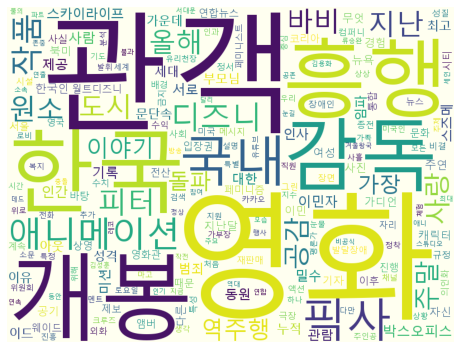

In [117]:
# 워드 클라우드 구현
wc = WordCloud(font_path = 'malgun', background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()